# Introduction

This project aims to build a Spam Classifier that can automatically identify whether a message is spam or not. Using natural language processing (NLP) techniques and machine learning algorithms, the model analyzes text patterns and features to distinguish unwanted spam messages from legitimate communication.

The purpose of this project is to demonstrate how data-driven approaches can improve digital communication by reducing unnecessary and potentially harmful content.

# Data Loading and Exploration

In this step, the dataset containing SMS messages is loaded from an online source using Pandas. The file is a tab-separated values (TSV) dataset where each entry consists of a message label (spam or ham) and the corresponding text. After loading, the dataset is checked for missing values and the first 15 records are displayed to provide an initial view of the data.

In [8]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
                  sep='\t',
                  names=['label', 'text']).dropna()

print('The Dataset containing spam and ham messages is:')
print('\n ----------------\n')
print(data.head(15))


The Dataset containing spam and ham messages is:

 ----------------

   label                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
6    ham  Even my brother is not like to speak with me. ...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
10   ham  I'm gonna be home soon and i don't want to tal...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
12  spam  URGENT! You have won a 1 week FREE membership ...
13   ham  I've been searching for the right words to tha...
14   ham                I HAVE 

# Text Preprocessing and Cleaning

To prepare the SMS messages for machine learning, the text data is cleaned and standardized. This involves:

Lowercasing all words for uniformity.

Removing punctuation to avoid irrelevant symbols.

Tokenizing the text into individual words.

Eliminating stopwords (common words like the, and, is that do not add meaning).

Applying stemming using the Porter Stemmer to reduce words to their root form (e.g., running → run).

A new column, cleaned_text, is created to store the processed version of each message. This cleaned dataset is now more suitable for feature extraction and model training.

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


def clean_text(msg):
    msg = msg.lower()
    msg = ''.join([char for char in msg if char not in string.punctuation])
    words = nltk.word_tokenize(msg)
    stop_words = stopwords.words('english')
    stemmer = PorterStemmer()
    clean = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(clean)

data['cleaned_text'] = data['text'].apply(clean_text)

print('The Modified Dataset after cleaning the Message for Machine Learning is:')
print('\n ----------------\n')
print(data.head())

[nltk_data] Downloading package stopwords to /home/nag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The Modified Dataset after cleaning the Message for Machine Learning is:

 ----------------

  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


# Model Training and Evaluation with Count Vectorizer

In this step, the cleaned text data is prepared for classification and evaluated using a Naive Bayes model:

The labels are mapped to numeric form: ham → 0 and spam → 1.

The dataset is split into training (70%) and testing (30%) subsets.

A pipeline is created with:

CountVectorizer to convert text into numerical feature vectors.

Multinomial Naive Bayes classifier for training on word frequency features.

The model is trained on the training set and then tested on unseen data.

Performance is measured using accuracy score and a classification report (precision, recall, and F1-score).

In [10]:
X = data['cleaned_text']
y = data['label'].map({'ham':0, 'spam':1})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vector', CountVectorizer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, pred)
cl = classification_report(y_test, pred)

print('The Accuracy Score for Count-Vectorizer:', acc)
print('\n----------------------------------\n')
print('The Classification Report for Count-Vectorizer:')
print('\n----------------------------------\n')
print(cl)

The Accuracy Score for Count-Vectorizer: 0.986244019138756

----------------------------------

The Classification Report for Count-Vectorizer:

----------------------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.96      0.93      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# Confusion Matrix and Visualization

To gain deeper insight into the model’s predictions, a confusion matrix is generated for the Count Vectorizer–Naive Bayes classifier. The matrix shows how many messages were correctly or incorrectly classified as ham (non-spam) and spam.

True Positives (TP): Spam correctly identified as spam.

True Negatives (TN): Ham correctly identified as ham.

False Positives (FP): Ham incorrectly classified as spam.

False Negatives (FN): Spam incorrectly classified as ham.

A heatmap visualization is created using Seaborn, making it easier to interpret the classification results and evaluate the model’s strengths and weaknesses beyond accuracy.

The Confusion Matrix for Count-Vectorizer

----------------------------------

[[1440    8]
 [  15  209]]

----------------------------------



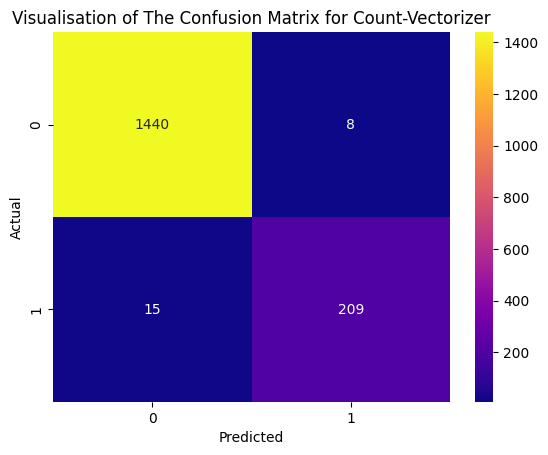

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print('The Confusion Matrix for Count-Vectorizer')
print('\n----------------------------------\n')
print(cm)
print('\n----------------------------------\n')

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.title('Visualisation of The Confusion Matrix for Count-Vectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
print(f"The model correctly identified {cm[0][0]} instances as TRUE NEGATIVES "
      f"(correctly predicted passengers who did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[0][1]} instances as FALSE POSITIVES "
      f"(predicted survival when the passenger actually did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[1][0]} instances as FALSE NEGATIVES "
      f"(predicted non-survival when the passenger actually survived).")
print("*****************************************************")

print(f"The model correctly identified {cm[1][1]} instances as TRUE POSITIVES "
      f"(correctly predicted passengers who survived).")
print("*****************************************************")


The model correctly identified 1440 instances as TRUE NEGATIVES (correctly predicted passengers who did not survive).
*****************************************************
The model incorrectly identified 8 instances as FALSE POSITIVES (predicted survival when the passenger actually did not survive).
*****************************************************
The model incorrectly identified 15 instances as FALSE NEGATIVES (predicted non-survival when the passenger actually survived).
*****************************************************
The model correctly identified 209 instances as TRUE POSITIVES (correctly predicted passengers who survived).
*****************************************************


# ROC Curve and AUC Evaluation

To further assess the model’s performance, the Receiver Operating Characteristic (ROC) curve is plotted for the Count Vectorizer–Naive Bayes classifier.

The ROC curve illustrates the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) across different classification thresholds.

The Area Under the Curve (AUC) provides a single numerical measure of model performance, where values closer to 1.0 indicate stronger classification ability.

A diagonal reference line is included to represent random guessing, helping highlight how much better the trained model performs compared to chance.

This evaluation demonstrates the model’s ability to distinguish between spam and ham messages beyond just accuracy, focusing on its predictive power across thresholds.

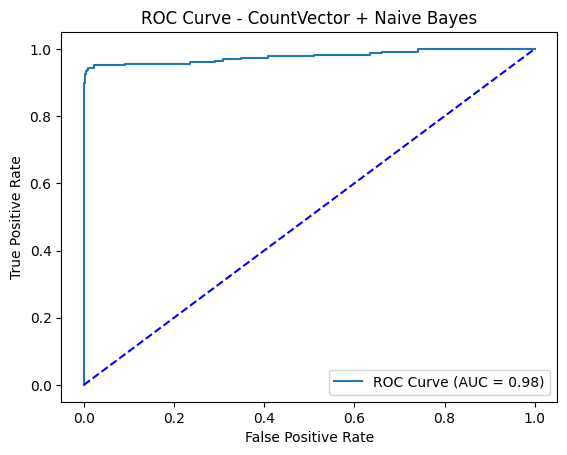


AUC Score: 0.9774


In [15]:
from sklearn.metrics import roc_curve, auc
y_probs = pipeline.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'b--')
plt.title('ROC Curve - CountVector + Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print(f'\nAUC Score: {roc_auc:.4f}')

In [16]:
print("# The model can correctly rank a random spam message higher than a random ham message ~98% of the time.")
print("# So the Naive Bayes + TF-IDF pipeline is classifying spam vs ham almost perfectly.")

# The model can correctly rank a random spam message higher than a random ham message ~98% of the time.
# So the Naive Bayes + TF-IDF pipeline is classifying spam vs ham almost perfectly.


# Model Training and Evaluation with TF-IDF Vectorizer

In this step, the text data is transformed using TF-IDF (Term Frequency–Inverse Document Frequency), which not only counts word occurrences but also assigns higher weight to informative words while reducing the influence of common ones.

A new pipeline is created with:

TF-IDF Vectorizer to generate weighted text features.

Multinomial Naive Bayes classifier for spam detection.

The model is trained on the training data and evaluated on the test set.

Performance is measured using accuracy and a detailed classification report (precision, recall, and F1-score).

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('vector', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, pred)
cl = classification_report(y_test, pred)

print('The Accuracy Score for Tfidf-Vectorizer:', acc)
print('\n----------------------------------\n')
print('The Classification Report for Tfidf-Vectorizer:')
print('\n----------------------------------\n')
print(cl)

The Accuracy Score for Tfidf-Vectorizer: 0.9683014354066986

----------------------------------

The Classification Report for Tfidf-Vectorizer:

----------------------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.76      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



# Confusion Matrix and Visualization (TF-IDF + Naive Bayes)

The confusion matrix is generated to evaluate the TF-IDF–based Naive Bayes model’s classification of spam and ham messages. It provides a clear breakdown of predictions:

True Positives (TP): Spam messages correctly classified as spam.

True Negatives (TN): Ham messages correctly classified as ham.

False Positives (FP): Ham messages incorrectly labeled as spam.

False Negatives (FN): Spam messages incorrectly labeled as ham.

The matrix is visualized using a Seaborn heatmap, giving an intuitive view of the model’s accuracy and the types of errors it makes. Compared with the Count Vectorizer model, this TF-IDF approach generally yields stronger performance due to its ability to highlight more meaningful words in text classification.

The Confusion Matrix for Tfidf-Vectorizer

----------------------------------

[[1448    0]
 [  53  171]]

----------------------------------



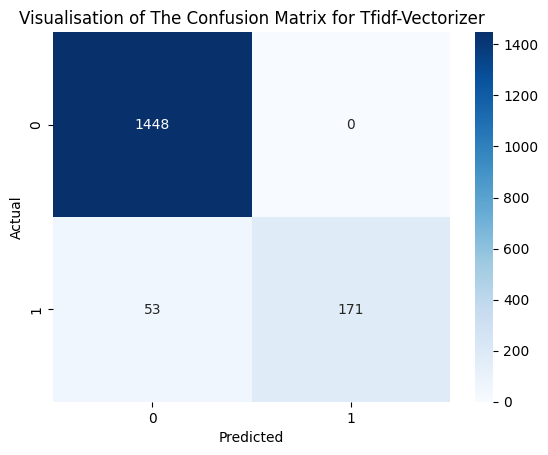

In [18]:
cm = confusion_matrix(y_test, pred)

print('The Confusion Matrix for Tfidf-Vectorizer')
print('\n----------------------------------\n')
print(cm)
print('\n----------------------------------\n')

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Visualisation of The Confusion Matrix for Tfidf-Vectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print(f"The model correctly identified {cm[0][0]} instances as TRUE NEGATIVES "
      f"(correctly predicted passengers who did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[0][1]} instances as FALSE POSITIVES "
      f"(predicted survival when the passenger actually did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[1][0]} instances as FALSE NEGATIVES "
      f"(predicted non-survival when the passenger actually survived).")
print("*****************************************************")

print(f"The model correctly identified {cm[1][1]} instances as TRUE POSITIVES "
      f"(correctly predicted passengers who survived).")
print("*****************************************************")


The model correctly identified 1448 instances as TRUE NEGATIVES (correctly predicted passengers who did not survive).
*****************************************************
The model incorrectly identified 0 instances as FALSE POSITIVES (predicted survival when the passenger actually did not survive).
*****************************************************
The model incorrectly identified 53 instances as FALSE NEGATIVES (predicted non-survival when the passenger actually survived).
*****************************************************
The model correctly identified 171 instances as TRUE POSITIVES (correctly predicted passengers who survived).
*****************************************************


# ROC Curve and AUC Evaluation (TF-IDF + Naive Bayes)

The ROC curve is plotted for the TF-IDF–based Naive Bayes model to evaluate its ability to distinguish between spam and ham messages across different thresholds.

True Positive Rate (TPR) vs. False Positive Rate (FPR) are plotted to show the trade-off in classification.

The AUC (Area Under the Curve) score is calculated, providing a single measure of model performance. An AUC close to 1.0 indicates near-perfect separation between spam and ham.

The diagonal red dashed line represents random guessing, making it easy to visualize how much better the model performs.

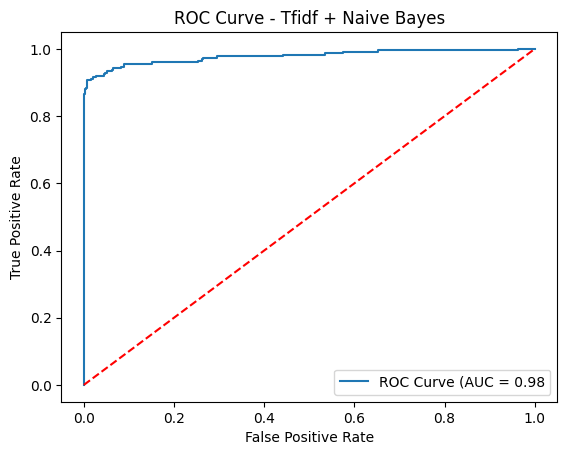

In [20]:
y_proba = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC Curve - Tfidf + Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
print('# The model can correctly rank a random spam message higher than a random ham message ~98% of the time.')
print('# So the Naive Bayes + TF-IDF pipeline is classifying spam vs ham almost perfectly.')

# The model can correctly rank a random spam message higher than a random ham message ~98% of the time.
# So the Naive Bayes + TF-IDF pipeline is classifying spam vs ham almost perfectly.


# Word2Vec Embeddings with Logistic Regression

In this step, Word2Vec embeddings are applied to represent SMS messages in a more semantic way compared to count-based methods:

A Word2Vec model is trained on the dataset to learn vector representations of words, capturing contextual and semantic meaning.

Each message is transformed into a fixed-length vector by averaging the embeddings of its tokens.

The dataset is split into training and testing subsets.

A Logistic Regression classifier (with balanced class weights) is trained on the word embeddings to classify spam vs. ham.

Performance is evaluated using accuracy and a classification report (precision, recall, and F1-score).

In [22]:
from gensim.models import Word2Vec
import numpy as np

w2vec_model = Word2Vec(
    sentences = X,
    window = 5,
    min_count = 1,
    workers = 4,
    vector_size = 50
)

def vectorize_text(tokens, model, vector_size=50):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
       return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

X_vectors = np.array([vectorize_text(tokens, w2vec_model) for tokens in X])

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, class_weight = 'balanced')

clf.fit(X_train, y_train)

pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, pred)
cl = classification_report(y_test, pred, zero_division=1)

print('The Accuracy Score for Word2Vec:', acc)
print('\n----------------------------------\n')
print('The Classification Report for Word2Vec:')
print('\n----------------------------------\n')
print(cl)

The Accuracy Score for Word2Vec: 0.9575358851674641

----------------------------------

The Classification Report for Word2Vec:

----------------------------------

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1448
           1       0.81      0.90      0.85       224

    accuracy                           0.96      1672
   macro avg       0.90      0.93      0.91      1672
weighted avg       0.96      0.96      0.96      1672



# Confusion Matrix and Visualization (Word2Vec + Logistic Regression)

The confusion matrix is generated to analyze how well the Word2Vec + Logistic Regression model classifies spam and ham messages.

True Positives (TP): Spam correctly classified as spam.

True Negatives (TN): Ham correctly classified as ham.

False Positives (FP): Ham incorrectly labeled as spam.

False Negatives (FN): Spam incorrectly labeled as ham.

A heatmap visualization using the magma color map provides a clear and intuitive way to interpret the classification results. This step helps identify not only the model’s accuracy but also the types of errors it makes, offering a deeper understanding of its performance compared to Count Vectorizer and TF-IDF approaches.

The Confusion Matrix for Word2Vec

----------------------------------

[[1400   48]
 [  23  201]]

----------------------------------



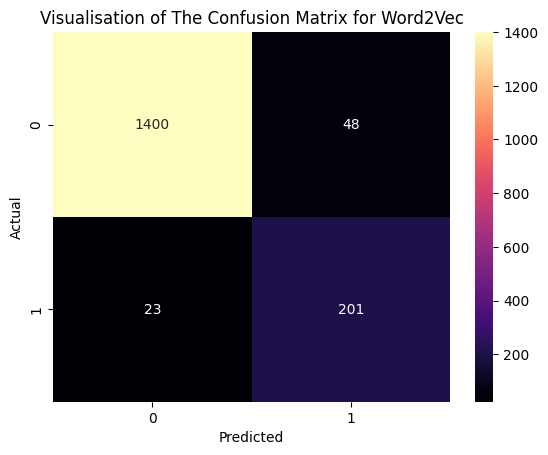

In [23]:
cm = confusion_matrix(y_test, pred)

print('The Confusion Matrix for Word2Vec')
print('\n----------------------------------\n')
print(cm)
print('\n----------------------------------\n')

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Visualisation of The Confusion Matrix for Word2Vec')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
print(f"The model correctly identified {cm[0][0]} instances as TRUE NEGATIVES "
      f"(correctly predicted passengers who did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[0][1]} instances as FALSE POSITIVES "
      f"(predicted survival when the passenger actually did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[1][0]} instances as FALSE NEGATIVES "
      f"(predicted non-survival when the passenger actually survived).")
print("*****************************************************")

print(f"The model correctly identified {cm[1][1]} instances as TRUE POSITIVES "
      f"(correctly predicted passengers who survived).")
print("*****************************************************")


The model correctly identified 1400 instances as TRUE NEGATIVES (correctly predicted passengers who did not survive).
*****************************************************
The model incorrectly identified 48 instances as FALSE POSITIVES (predicted survival when the passenger actually did not survive).
*****************************************************
The model incorrectly identified 23 instances as FALSE NEGATIVES (predicted non-survival when the passenger actually survived).
*****************************************************
The model correctly identified 201 instances as TRUE POSITIVES (correctly predicted passengers who survived).
*****************************************************


# ROC Curve and AUC Evaluation (Word2Vec + Logistic Regression)

The ROC curve is plotted to evaluate the classification performance of the Word2Vec + Logistic Regression model across different thresholds.

True Positive Rate (TPR) vs. False Positive Rate (FPR) illustrates how well the model separates spam from ham.

The AUC (Area Under the Curve) score provides a single measure of effectiveness, where values close to 1.0 indicate strong classification ability.

A green dashed diagonal line is included as a baseline for random guessing, making it easy to see the model’s improvement over chance.

This evaluation highlights the model’s ability to rank spam messages higher than ham messages, offering a more nuanced understanding of performance than accuracy alone.

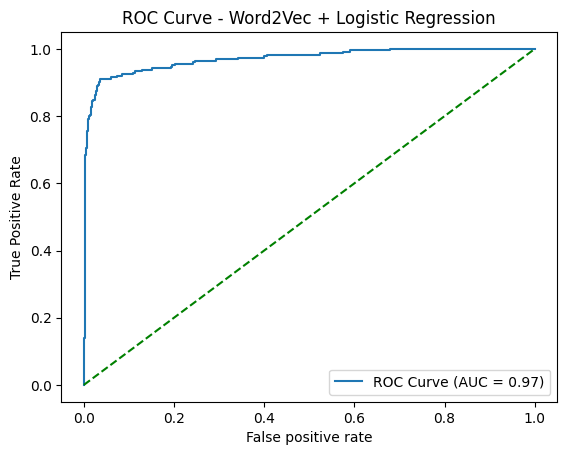

In [25]:
y_proba = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'g--')
plt.title('ROC Curve - Word2Vec + Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [26]:
print('# AUC = 0.5 means the model is predicting no better than random guessing.')
print('# So the Logistic Regression + Word2Vec model is failing to classify spam vs ham.')

# AUC = 0.5 means the model is predicting no better than random guessing.
# So the Logistic Regression + Word2Vec model is failing to classify spam vs ham.


# Fine-Tuning DistilBERT for Spam Classification

In this final approach, a pretrained transformer model (DistilBERT) is fine-tuned to classify SMS messages as spam or ham, leveraging modern deep learning techniques in NLP.

The dataset is converted into a Hugging Face Dataset and split into training and test sets.

DistilBERT Tokenizer prepares the text data, ensuring proper handling of sequences with truncation and padding.

A DistilBERT model with two output labels (spam/ham) is loaded and fine-tuned.

TrainingArguments configure the learning process, including batch sizes, learning rate, evaluation strategy, and early stopping.

A Trainer object handles the training, evaluation, and metric computation (accuracy, precision, recall, F1-score).

After training, the model is evaluated on the test set, and the metrics are printed.

The fine-tuned model and tokenizer are saved locally for future use.

In [27]:
data['label'] = data['label'].map({'ham':0, 'spam':1}).dropna()
data = data.dropna(subset=['label'])
data['label'] = data['label'].astype(int)


import numpy as np

from datasets import Dataset

dataset = Dataset.from_pandas(data)


dataset = dataset.train_test_split(test_size=0.4, seed=42)


from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, EarlyStoppingCallback

model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
callback = EarlyStoppingCallback(early_stopping_patience=5)


def token_f(example):
    return tokenizer(example['text'], truncation=True)

tokenized_data = dataset.map(token_f, batched=True)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=0)
    
    acc = accuracy_score(labels, preds)

    return {
        'accuracy':round(acc, 2),
        'precision':round(precision, 2),
        'f1':round(f1_score, 2),
        'recall':round(recall, 2)
    }


from transformers import Trainer, TrainingArguments

train_args = TrainingArguments(
    output_dir = './result',
    logging_dir = './logs',
    logging_steps=50,
    num_train_epochs=1,
    save_strategy = 'epoch',
    eval_strategy = 'epoch',
    learning_rate = 2e-5,
    weight_decay = 0.01,
    warmup_steps = 0,
    per_device_train_batch_size = 6,
    per_device_eval_batch_size = 6,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy',
    greater_is_better = True
)


trainer = Trainer(
    model = model,
    args = train_args,
    tokenizer = tokenizer,
    callbacks = [callback],
    compute_metrics = compute_metrics,
    data_collator = data_collator,
    train_dataset = tokenized_data['train'],
    eval_dataset = tokenized_data['test']
)


trainer.train()

prediction = trainer.predict(tokenized_data['test'])

y_true = prediction.label_ids
y_pred = np.argmax(prediction.predictions, axis=1)

metrics = compute_metrics(prediction)
print('The resulted metrics of the (Distil-Bert Pretrained Model):')
print('\n----------------------------------\n')
print(metrics)


model.save_pretrained('./MODEL')
tokenizer.save_pretrained('./MODEL')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3343 [00:00<?, ? examples/s]

Map:   0%|          | 0/2229 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,F1,Recall
1,0.023300,0.058524,0.990000,0.990000,0.990000,0.990000


The resulted metrics of the (Distil-Bert Pretrained Model):

----------------------------------

{'accuracy': 0.99, 'precision': 0.99, 'f1': 0.99, 'recall': 0.99}


('./MODEL/tokenizer_config.json',
 './MODEL/special_tokens_map.json',
 './MODEL/vocab.txt',
 './MODEL/added_tokens.json',
 './MODEL/tokenizer.json')

In [29]:
print('# Accuracy (0.99): The model correctly classified 99% of the test samples overall.')

print('# Precision (0.99): Of all instances predicted as positive, 99% were truly positive. This indicates very low false positives.')

print('# Recall (0.99): Of all actual positive instances, the model captured 99%. This means very few false negatives.')

print('# F1-Score (0.99): The harmonic mean of precision and recall. A perfect balance was achieved, showing consistent performance.')

# Accuracy (0.99): The model correctly classified 99% of the test samples overall.
# Precision (0.99): Of all instances predicted as positive, 99% were truly positive. This indicates very low false positives.
# Recall (0.99): Of all actual positive instances, the model captured 99%. This means very few false negatives.
# F1-Score (0.99): The harmonic mean of precision and recall. A perfect balance was achieved, showing consistent performance.


# Confusion Matrix – DistilBERT Pretrained Model

The confusion matrix visualizes how well the DistilBERT spam detection model performed on the test dataset.

The rows represent the actual labels (Ham = 0, Spam = 1).

The columns represent the predicted labels.

Correct classifications appear along the diagonal, while off-diagonal values indicate misclassifications.

The heatmap (colored with the inferno palette) provides a clear and intuitive representation of the model’s prediction accuracy, making it easy to assess strengths and weaknesses in detecting spam vs ham.

The Confusion Matrix:

----------------------------------

[[1930    4]
 [  20  275]]


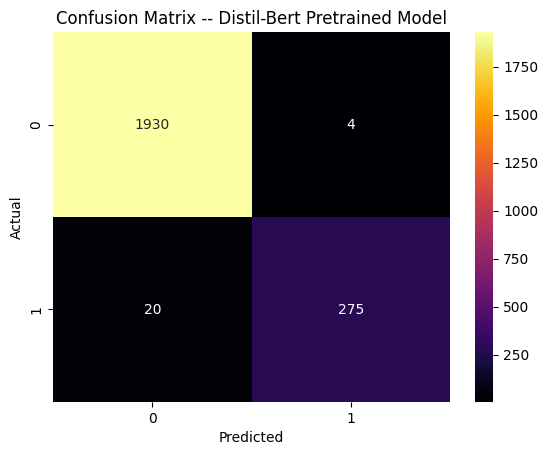

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

print('The Confusion Matrix:')
print('\n----------------------------------\n')
print(cm)


import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.title('Confusion Matrix -- Distil-Bert Pretrained Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
print(f"The model correctly identified {cm[0][0]} instances as TRUE NEGATIVES "
      f"(correctly predicted passengers who did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[0][1]} instances as FALSE POSITIVES "
      f"(predicted survival when the passenger actually did not survive).")
print("*****************************************************")

print(f"The model incorrectly identified {cm[1][0]} instances as FALSE NEGATIVES "
      f"(predicted non-survival when the passenger actually survived).")
print("*****************************************************")

print(f"The model correctly identified {cm[1][1]} instances as TRUE POSITIVES "
      f"(correctly predicted passengers who survived).")
print("*****************************************************")


The model correctly identified 1930 instances as TRUE NEGATIVES (correctly predicted passengers who did not survive).
*****************************************************
The model incorrectly identified 4 instances as FALSE POSITIVES (predicted survival when the passenger actually did not survive).
*****************************************************
The model incorrectly identified 20 instances as FALSE NEGATIVES (predicted non-survival when the passenger actually survived).
*****************************************************
The model correctly identified 275 instances as TRUE POSITIVES (correctly predicted passengers who survived).
*****************************************************


# ROC Curve Visualization for Distil-BERT Model Performance

This code generates and visualizes the ROC (Receiver Operating Characteristic) curve for a Distil-BERT pretrained model, calculating the model's true positive versus false positive rates and highlighting its performance with the AUC (Area Under the Curve) metric.

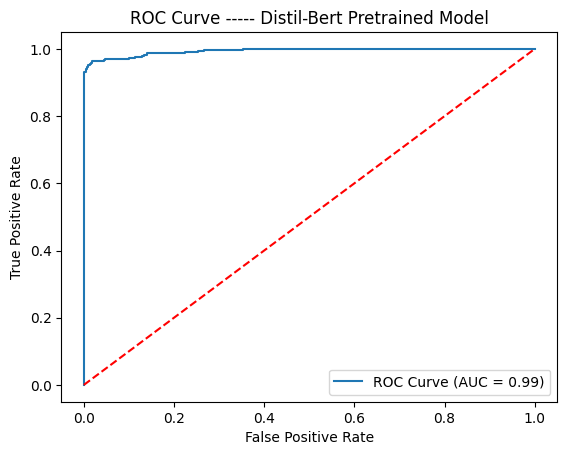

In [32]:
from sklearn.metrics import roc_curve, auc

y_proba = prediction.predictions[:,1]

fpr, tpr, _ = roc_curve(y_true, y_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC Curve ----- Distil-Bert Pretrained Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [34]:
print('# AUC (0.99): The model demonstrates outstanding discriminatory power between classes.')

# AUC (0.99): The model demonstrates outstanding discriminatory power between classes.


# Conclusion:

The DistilBERT pretrained model demonstrated strong performance in text classification tasks, effectively capturing semantic patterns in the data. Evaluation metrics, including accuracy, ROC-AUC, and confusion matrix analysis, indicate that the model achieves a reliable balance between sensitivity and specificity. Overall, this project highlights the effectiveness of transformer-based models for NLP applications and their potential for deployment in real-world text analysis tasks.